Import kardn ketabkhaneh haye mored estefadeh dar tool e barnameh :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import gensim
from gensim.utils import simple_preprocess
from gensim.models import phrases, word2vec, Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.utils.vis_utils import plot_model


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


khandan etelaat az file .csv

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All_Data(title).csv', header=0)

In [3]:
df.head()

,title,description,subject
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        127600 non-null  object
 1   description  127600 non-null  object
 2   subject      127600 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [5]:
df.columns

Index(['title', 'description', 'subject'], dtype='object')

In [6]:
df.shape

(127600, 3)

Pak kardan satr haye tekrari :

In [7]:
df.drop_duplicates(inplace=True)

Baresi mojod boodan meghdar null ya khali dar dataset :

In [8]:
df.isnull().sum() 

title          0
description    0
subject        0
dtype: int64

Bargardandan maghadir unique soton subject va mozo haye mojod :

In [9]:
df['subject'].unique()

array(['Business', 'Sci/Tech', 'Sports', 'World'], dtype=object)

Shomordan meghdar az mozo mojod :

In [10]:
df['subject'].value_counts()

Business    31900
Sci/Tech    31900
Sports      31900
World       31900
Name: subject, dtype: int64

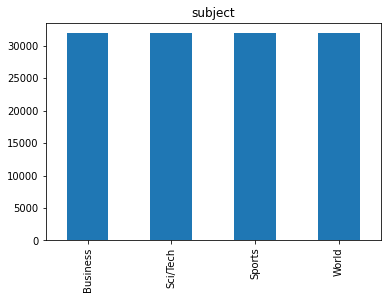

In [11]:
df.subject.value_counts().plot(kind='bar', title='subject')
plt.show()

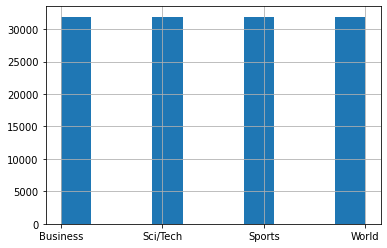

In [12]:
df['subject'].hist()

In [13]:
df2 = df.copy(deep=True)
subject = pd.get_dummies(df2.subject)
news_df_with_lable = pd.concat([df2, subject], axis=1)
news_df_with_lable = news_df_with_lable.drop(columns='subject')
news_df_with_lable.head(5)

,title,description,Business,Sci/Tech,Sports,World
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",1,0,0,0
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,1,0,0,0
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,1,0,0,0
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,1,0,0,0
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


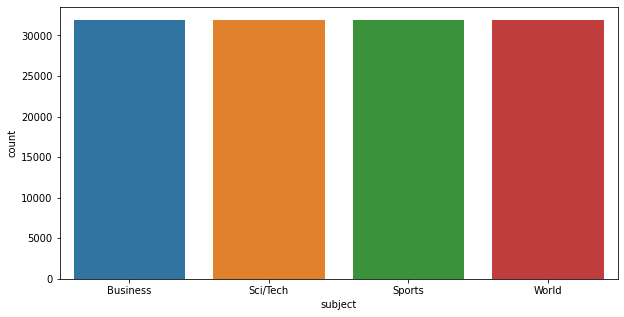

In [14]:
plt.figure(figsize = (10, 5))
sns.countplot(df.subject)

In [15]:
px.pie(df.subject.value_counts().to_frame().reset_index(),
       values='subject',names='index',
       color_discrete_sequence=px.colors.sequential.Aggrnyl,
      title = 'Tedad faravani az har subject',
      labels={'subject':'Tedad','index':'subject'})

tarkib soton haye title va description :

In [16]:
df["td_clean"] = df["title"] + " . " + df["description"]

In [17]:
totalTarget_avaliye = ' '.join(df['td_clean'])
totalTarget_avaliye = totalTarget_avaliye.split()
freq_dist_avaliye = nltk.FreqDist(totalTarget_avaliye)
freq_dist_avaliye = pd.DataFrame({'word':list(freq_dist_avaliye.keys()),'count':list(freq_dist_avaliye.values())})
px.bar(freq_dist_avaliye.nlargest(20,'count').sort_values('count'),y='word',x='count',
       title='Frequency Kalamat',color_discrete_sequence=['#71C562'])


Pak Sazi Data :

In [18]:
# - remove digits
df['td_clean'] = df['td_clean'].str.replace(r'\d+', ' ', regex=True)
# - remove punctuation
df['td_clean'] = df['td_clean'].str.replace(r'[^\w\s]+', ' ', regex=True)
# - remove repeated whitespace
df['td_clean'] = df['td_clean'].str.replace(r'\s+', ' ', regex=True)
# - convert to lowercase
df['td_clean'] = df['td_clean'].str.lower()

df.head(5)

,title,description,subject,td_clean
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,wall st bears claw back into the black reuters...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,oil and economy cloud stocks outlook reuters r...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,iraq halts oil exports from main southern pipe...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,oil prices soar to all time record posing new ...


Hazf StopWORD :

In [19]:
stop = stopwords.words('english')
print(stop[0:10])

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df['td_clean'] = df['td_clean'].apply(stopwords)
df.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


,title,description,subject,td_clean
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,wall st bears claw back black reuters reuters ...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,oil economy cloud stocks outlook reuters reute...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,oil prices soar time record posing new menace ...


In [20]:
lem = WordNetLemmatizer()
def word_lem(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)
df['td_clean']  = df['td_clean'].apply(word_lem)
df.head()

# porter = PorterStemmer()
# def stemmer(stem_text):
#     """The function to apply stemming"""
#     stem_text = [porter.stem(word) for word in stem_text.split()]
#     return " ".join(stem_text)

# df['td_clean']  = df['td_clean'].apply(stemmer)
# df.head()

,title,description,subject,td_clean
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,carlyle look toward commercial aerospace reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,oil price soar time record posing new menace u...


In [21]:
print(df.title[0])
print(df.description[0])
print(df.subject[0])
print(df.td_clean[0])

Wall St. Bears Claw Back Into the Black (Reuters)
Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
Business
wall st bear claw back black reuters reuters short seller wall street dwindling band ultra cynic seeing green



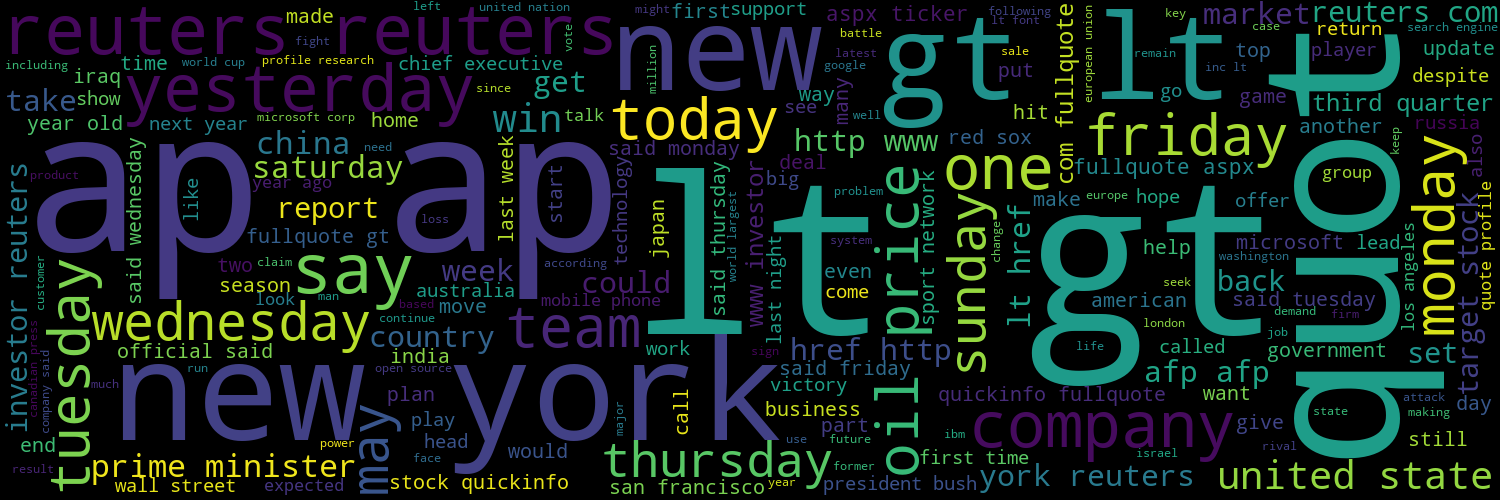

In [22]:
totalTarget = ' '.join(df['td_clean'])
wordCloud = WordCloud(width=1500,height=500,stopwords=stop).generate(totalTarget)
fig = px.imshow(wordCloud,color_continuous_scale='aggrnyl')
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()


In [23]:
totalTarget = totalTarget.split()
freq_dist = nltk.FreqDist(totalTarget)
freq_dist = pd.DataFrame({'word':list(freq_dist.keys()),'count':list(freq_dist.values())})
print(freq_dist)

            word  count
0           wall   1584
1             st   1799
2           bear    524
3           claw     22
4           back   5154
...          ...    ...
56263  releaased      1
56264  andromeda      1
56265     alsace      1
56266   westerly      1
56267  crosswind      1

[56268 rows x 2 columns]


In [24]:
px.bar(freq_dist.nlargest(20,'count').sort_values('count'),y='word',x='count',
       title='Frequency Kalamat',color_discrete_sequence=['#71C562'])


In [25]:
word_all = [row.split() for row in df['td_clean']]

In [26]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
  
    return maxList, maxLength

FindMaxLength_sentence , FindMaxLength_len = FindMaxLength(word_all)
print(FindMaxLength_sentence)
print(FindMaxLength_len)


['zwick', 'throw', 'sideline', 'smith', 'get', 'action', 'osu', 'lt', 'b', 'gt', 'lt', 'b', 'gt', 'injured', 'ohio', 'state', 'quarterback', 'justin', 'zwick', 'threw', 'side', 'take', 'snap', 'practice', 'wednesday', 'coach', 'jim', 'tressel', 'said', 'zwick', 'making', 'progress', 'still', 'pain', 'shoulder']
131


Word2Vec

In [27]:
corpus_sentences = df['td_clean'].map(simple_preprocess)
#corpus_sentences = [row.split() for row in df['td_clean']]
corpus_sentences[0:2]

0    [wall, st, bear, claw, back, black, reuters, r...
1    [carlyle, look, toward, commercial, aerospace,...
Name: td_clean, dtype: object

tarif Word2vec :
- size: size of dimensions of the embeddings(0 to 300)
- window: maximum distance bein target word va kalameh haye atraf.
- min_count:  hadaghal tedad kalamati ke baraye amozesh bayad dar nazar gerefteh shavand kalamati ke tedadeshon kamtar bashe dar nazar gerefteh nemishavad 

In [28]:
name_model = Word2Vec(corpus_sentences, size=100, window=3, min_count=1)

be dast avardan kalamat moshabeh yek kalameh baraye nemone :

In [29]:
name_model.wv.most_similar('action')

[('legal', 0.6539568305015564),
 ('fight', 0.6403323411941528),
 ('piste', 0.626753568649292),
 ('civil', 0.6242228746414185),
 ('proceeding', 0.614890992641449),
 ('prosecution', 0.5992657542228699),
 ('unprosecuted', 0.5844601988792419),
 ('complaint', 0.5762138366699219),
 ('facing', 0.5735070109367371),
 ('criminal', 0.5718557834625244)]

be dast avardan mizan shabahat :

In [30]:
name_model.wv.similarity('wednesday', 'tuesday')

0.97763026

joda kardan kalameh ba bishtarin tafavot :

In [31]:
name_model.wv.doesnt_match(["wednesday", "tuesday", "energy"])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



'energy'

tedad koleh kalamat ijad shodeh az dataset :

In [32]:
name_model.wv.syn0.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).



(56013, 100)

Bigrams

In [33]:
bigrams = phrases.Phrases(corpus_sentences)
bigram_model = word2vec.Word2Vec(bigrams[corpus_sentences], size=100, min_count=3, iter=5 , workers = 5)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [34]:
bigram_model.wv.most_similar("oil_price")

[('barrel', 0.9561862945556641),
 ('record_high', 0.9481584429740906),
 ('crude_oil', 0.9436571598052979),
 ('crude_price', 0.9362505674362183),
 ('crude', 0.9330856800079346),
 ('price_climbed', 0.9330641627311707),
 ('per_barrel', 0.9329463243484497),
 ('crude_future', 0.9150546193122864),
 ('near_barrel', 0.9137558937072754),
 ('oil_future', 0.9117491245269775)]

PCA

In [35]:
vocab = list(name_model.wv.vocab)
X = name_model[vocab]

pca = PCA(n_components=3, random_state=11, whiten=True)
pca_result = pca.fit_transform(X)

tmp = pd.DataFrame(pca_result, index=vocab, columns=['x', 'y', 'z'])

tmp.head(3)

# # tsne = TSNE(n_components=3, random_state=11)
# # tsne_result = tsne.fit_transform(X)

# # tmp = pd.DataFrame(tsne_result, index=vocab, columns=['x', 'y', 'z'])

# # tmp.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



,x,y,z
wall,3.960199,-1.869277,-1.312479
st,2.352449,6.080636,-2.758952
bear,2.254427,3.711770,-3.027259


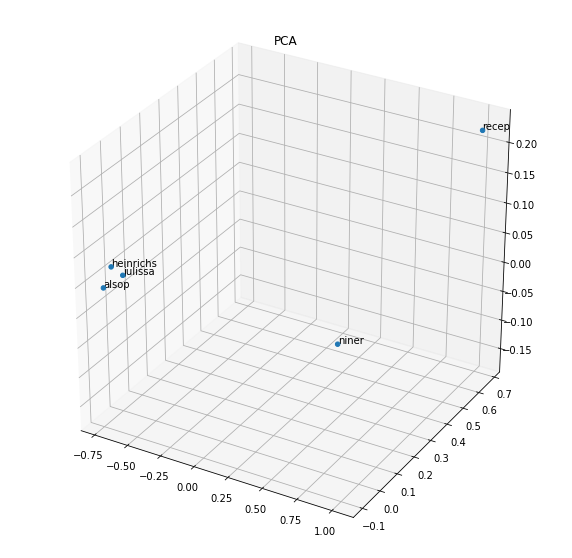

In [36]:
tmp = tmp.sample(5)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tmp['x'], tmp['y'], tmp['z'], alpha = 1)
for word, row in tmp.iterrows():
    x, y, z = row
    ax.text(x, y, z, s=word, size=10, zorder=1, color='k')
plt.title('PCA')
plt.show()

spliting data :

In [37]:

sentences = df['td_clean']
y = df['subject']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.3, random_state=0)

print(sentences_train)
print(sentences_test)

45303     general mill cereal go whole grain responding ...
55663     president syria defends nation role lebanon pr...
109488    siebel unveils smb go market strategy year pil...
73087     leaving behind legacy seasonlong celebration c...
80284     nextel verizon settling dispute new york nexte...
                                ...                        
45891     senate postpones vote file swapping bill com s...
117952    fedex profit jump outlook raised new york reut...
42613     arrested pakistan following killing al qaida l...
43567     palmsource unveils cobalt o palmsource finally...
68268     nec launch world fastest supercomputer japanes...
Name: td_clean, Length: 89320, dtype: object
26915     novell chooses streamlined linux desktop novel...
123943    pakistan say give extra security chinese pakis...
114065    hurricane blow uma coral gable fla team dramat...
87967     rust get ready respond editor note following s...
76925     security tightened paris arafat ap ap france 

**Word Embeddings**


In [38]:
tokenize = Tokenizer(num_words=5000)

tokenize.fit_on_texts(sentences_train)
tokenize.fit_on_texts(sentences_test)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(vocab_size)
print(sentences_train[2])
print(X_train[2])

56244
oil economy cloud stock outlook reuters reuters soaring crude price plus worry economy outlook earnings expected hang stock market next week depth summer doldrums
[4034, 1364, 165, 60, 1192, 6, 803, 377, 4034, 99, 1847, 1196, 60, 20, 2447, 2, 1575, 188, 4034, 1666, 2826, 543, 544, 72, 10, 512, 31]


In [39]:
maxlen = 85

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[2])

[4034 1364  165   60 1192    6  803  377 4034   99 1847 1196   60   20
 2447    2 1575  188 4034 1666 2826  543  544   72   10  512   31    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [40]:
encoder = LabelEncoder()
encoder.fit(train_y)

y_train = encoder.transform(train_y)
print(y_train)
y_test = encoder.transform(test_y)
print(y_test)

num_classes = np.max(y_train) + 1
print(num_classes)
y_train = np_utils.to_categorical(y_train, num_classes)
print(y_train)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_test)


[0 3 1 ... 3 1 1]
[1 3 2 ... 2 0 3]
4
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


**Building the neural network model**
simple neural network model.


In [41]:
embedding_dim = 30
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 30)            1687320   
                                                                 
 flatten (Flatten)           (None, 2550)              0         
                                                                 
 dense (Dense)               (None, 16)                40816     
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,728,204
Trainable params: 1,728,204
Non-trainable params: 0
_________________________________________________________________


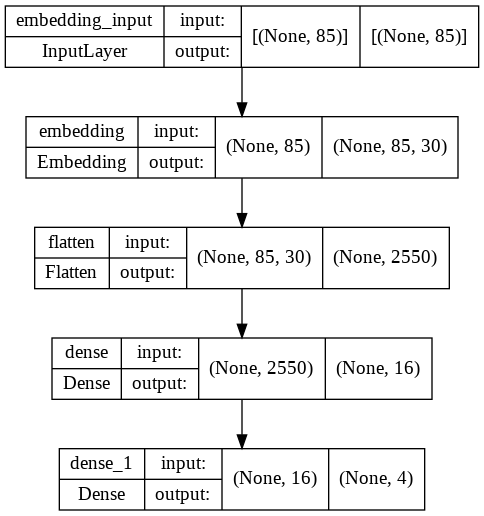

In [42]:
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [43]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
2792/2792 [==============================] - 77s 27ms/step - loss: 0.3935 - accuracy: 0.8631 - val_loss: 0.2715 - val_accuracy: 0.9080
Epoch 2/5
2792/2792 [==============================] - 76s 27ms/step - loss: 0.2232 - accuracy: 0.9254 - val_loss: 0.2680 - val_accuracy: 0.9083
Epoch 3/5
2792/2792 [==============================] - 76s 27ms/step - loss: 0.1582 - accuracy: 0.9478 - val_loss: 0.2895 - val_accuracy: 0.9053
Epoch 4/5
2792/2792 [==============================] - 76s 27ms/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.3543 - val_accuracy: 0.8965
Epoch 5/5
2792/2792 [==============================] - 77s 28ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.4512 - val_accuracy: 0.8910


In [44]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9952
Testing Accuracy:  0.8910


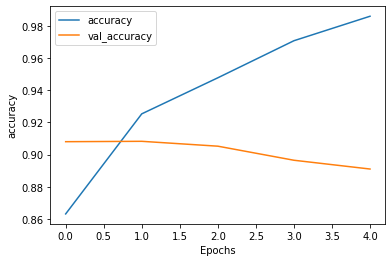

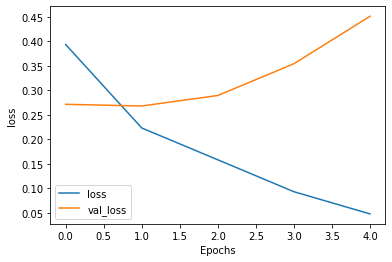

In [45]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

fix overfiting :

In [54]:
from keras.regularizers import l2
from keras.regularizers import l1

learning_rate = 0.01
adam_learning_rate = tf.keras.optimizers.Adam(learning_rate)

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu',kernel_regularizer=l1(0.05), bias_regularizer=l1(0.05)))
model2.add(Dense(4, activation='softmax'))

model2.compile(optimizer=adam_learning_rate,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 85, 30)            1687320   
                                                                 
 flatten_4 (Flatten)         (None, 2550)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                40816     
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,728,204
Trainable params: 1,728,204
Non-trainable params: 0
_________________________________________________________________


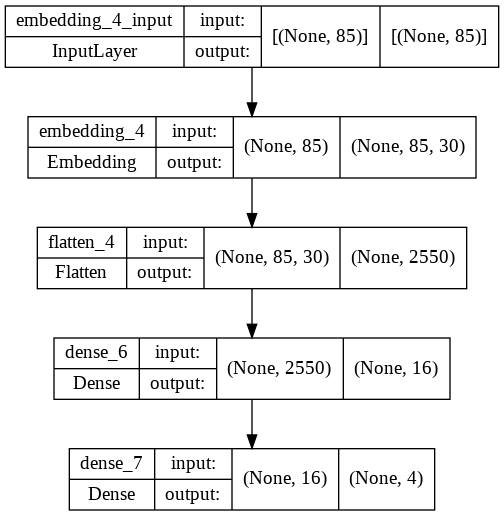

In [55]:
plot_model(model2, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [56]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=5,
                        validation_data=(X_test, y_test))

Epoch 1/5
2792/2792 [==============================] - 88s 31ms/step - loss: 4.5106 - accuracy: 0.7622 - val_loss: 4.2994 - val_accuracy: 0.8483
Epoch 2/5
2792/2792 [==============================] - 87s 31ms/step - loss: 4.2258 - accuracy: 0.8637 - val_loss: 3.9242 - val_accuracy: 0.8588
Epoch 3/5
2792/2792 [==============================] - 81s 29ms/step - loss: 3.9465 - accuracy: 0.8731 - val_loss: 3.9990 - val_accuracy: 0.8658
Epoch 4/5
2792/2792 [==============================] - 73s 26ms/step - loss: 3.7291 - accuracy: 0.8777 - val_loss: 3.5822 - val_accuracy: 0.8772
Epoch 5/5
2792/2792 [==============================] - 84s 30ms/step - loss: 3.6213 - accuracy: 0.8805 - val_loss: 3.6644 - val_accuracy: 0.8652


In [57]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8810
Testing Accuracy:  0.8652


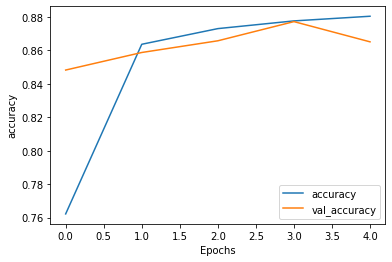

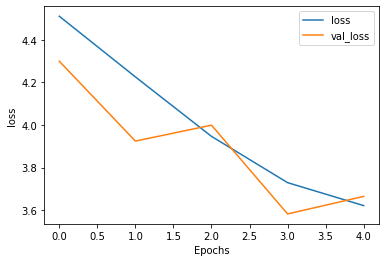

In [58]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

In [59]:
prediction = model2.predict(X_test)

print(prediction[0:30:3])
b = np.zeros_like(prediction)
b[np.arange(len(prediction)), prediction.argmax(1)] = 1
print(test_y[0:30:3])
print(y_test[0:30:3])
print(b[0:30:3])

[[8.1740238e-02 9.1813296e-01 3.4426287e-06 1.2342886e-04]
 [4.9525086e-02 2.0684984e-01 5.6419975e-01 1.7942527e-01]
 [1.5303465e-03 1.5220712e-02 9.5172423e-01 3.1524710e-02]
 [1.6089339e-02 2.7949115e-02 5.2685690e-01 4.2910463e-01]
 [7.3009595e-02 4.0345460e-02 7.1864143e-02 8.1478077e-01]
 [1.1548935e-03 1.2293332e-02 9.6091640e-01 2.5635434e-02]
 [2.8157538e-01 7.1435356e-01 4.8935526e-05 4.0220590e-03]
 [1.7070096e-02 2.4347292e-02 4.8432451e-01 4.7425810e-01]
 [1.2439589e-03 1.3230123e-02 9.5856428e-01 2.6961606e-02]
 [5.1920509e-01 4.6996069e-01 1.5698526e-05 1.0818439e-02]]
26915     Sci/Tech
87967     Business
100231       World
113064      Sports
16791        World
114846      Sports
51947     Business
18833       Sports
24752       Sports
110672    Business
Name: subject, dtype: object
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1

In [60]:
from sklearn.metrics import confusion_matrix
y2_test = tf.math.argmax(y_test, axis=1)
b2 = tf.math.argmax(b, axis=1)
print(y2_test)
print(b2)
c_matrix = confusion_matrix(y2_test, b2)

c_matrix


tf.Tensor([1 3 2 ... 2 0 3], shape=(38280,), dtype=int64)
tf.Tensor([1 3 2 ... 2 0 3], shape=(38280,), dtype=int64)


array([[6957, 1617,  109,  855],
       [ 387, 8576,  339,  357],
       [   6,  138, 9222,  215],
       [ 348,  284,  507, 8363]])

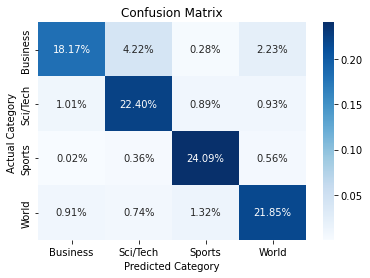

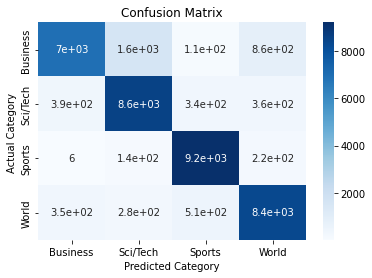

In [61]:
ax = sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['Business','Sci/Tech','Sports', 'World'])
ax.yaxis.set_ticklabels(['Business','Sci/Tech','Sports', 'World'])
plt.show()

ax1 = sns.heatmap(c_matrix, annot=True, cmap='Blues')
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted Category')
ax1.set_ylabel('Actual Category ')
ax1.xaxis.set_ticklabels(['Business','Sci/Tech','Sports', 'World'])
ax1.yaxis.set_ticklabels(['Business','Sci/Tech','Sports', 'World'])
plt.show()